In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()
targets = pd.get_dummies(df['koi_disposition'],drop_first=False)

df = pd.concat([df,targets],axis=1)
df.drop(['koi_disposition'],axis=1,inplace=True)
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0


C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bethf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


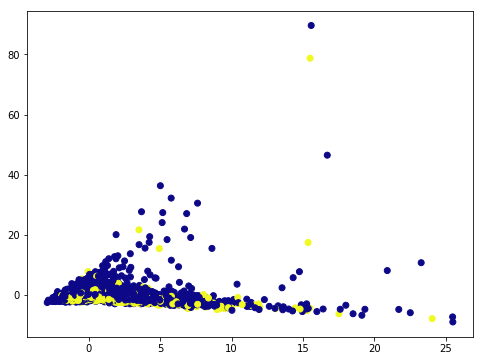

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target = df["CANDIDATE"]
data = df.drop("CANDIDATE",axis=1)
scaler.fit(data)
scaled_data = scaler.transform(data)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap="plasma")

C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bethf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


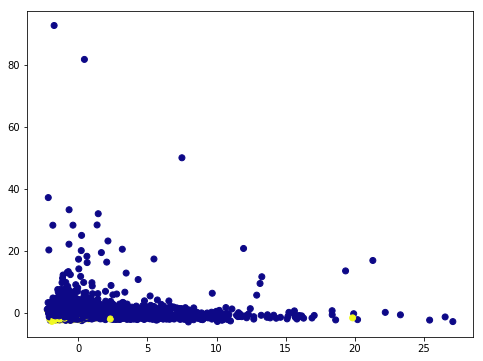

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target = df["CONFIRMED"]
data = df.drop("CONFIRMED",axis=1)
scaler.fit(data)
scaled_data = scaler.transform(data)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap="plasma")

C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bethf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


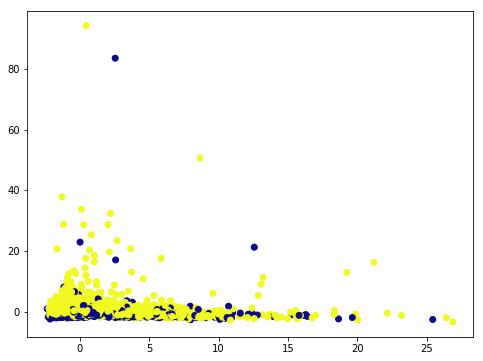

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target = df["FALSE POSITIVE"]
data = df.drop("FALSE POSITIVE",axis=1)
scaler.fit(data)
scaled_data = scaler.transform(data)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap="plasma")